# Title: A/B Test Analysis

# Author: James Amezcua

# Introduction

This report presents the analysis of an A/B test results for an online store. First, we will examine the 9 hypotheses compiled by the marketing department to boost revenues, and decide which ones to prioritize.

Following this, we will analyze the A/B test results. The analysis focuses on comparing the cumulative revenue, average order size, and conversion rates between the two groups.

Then we will carry out 4 statistical significance tests, which we use to see if the two groups have the same conversion rates and average order size, using both raw data and data removed of anomalies. On the basis of this analysis, we will decide what to do next about the test.

# Table of content

Part 1: Hypothesis data importing and calculation

Part 2: Visitors and orders data importing and preprocessing

Part 3: Analysis of A/B test

Part 4: Detecting anomalies

Part 5: Statistical significance testing

Part 6: Findings and conclusions

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import stats as st
from IPython.display import display
import seaborn as sns
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
import warnings
warnings.filterwarnings("ignore")
pd.set_option('max_colwidth', 400)

# Part 1: Hypothesis data importing and calculation

In this section, we will:

import and check the data containing the 9 hypotheses;

apply the ICE framework to prioritize hypotheses; and

apply the RICE framework to prioritize hypotheses.

In [2]:
hypothesis = pd.read_csv(
    'https://code.s3.yandex.net/datasets/hypotheses_us.csv', sep=';')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [4]:
hypothesis.columns=hypothesis.columns.str.lower()

In [5]:
hypothesis['ICE'] = (hypothesis['impact'] *
                     hypothesis['confidence'])/hypothesis['effort']

In [6]:
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


The top 5 hypotheses with the highest scores are no. 8, 0, 7, 6, and 2.

Now let's include 'reach' and calculate the RICE scores.

In [7]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] *
                     hypothesis['confidence'])/hypothesis['effort']

In [8]:
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


Judging from the RICE scores, the 5 most promising hypotheses are no. 7, 2, 0, 6, and 8. The same five as from ICE calculation but in different order.

Now let's also make a scatterplot with the x asix showing the ICE score and y axis showing the RICE score.

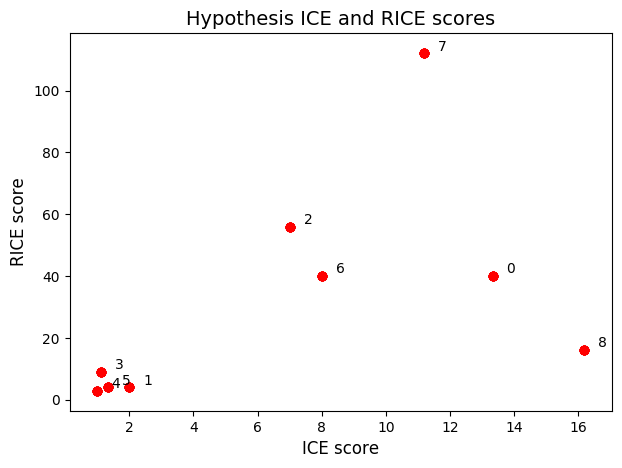

In [9]:
x = hypothesis['ICE']
y = hypothesis['RICE']
types = hypothesis.index

fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x, y)

ax.set_xlabel('ICE score', fontsize=12)
ax.set_ylabel('RICE score', fontsize=12)
ax.set_title('Hypothesis ICE and RICE scores', fontsize=14)

for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(10, 2), textcoords='offset points')
    plt.scatter(x, y, color='red')

Shown on the scatterplot, the more top and right hand side a hypothesis is positioned towards, the more promising it is.

No.7 hypothesis jumped to the top the RICE score list because it has the highest reach score, which is 10. Indeed, adding a subscription form to all the main page will affect all users. No.8 hypothesis fell to the 5th place in RICE from 1st in ICE because it has the lowest reach score, which is 1. This is because this hypothesis will only affect those whose birthdays fall in a specific period of time.

Therefore using which method to prioritize the hypothesis does make a difference. In the case of this project, the two methods produce the same 5 hypotheses that the company should prioritize for testing. So any of the five could make a strong case.

# Part 1 Summary 

In this section, we imported the data containing the 9 hypotheses and calcuated their ICE and RICE scores. Based on the results, the company can decide which hypotheses to test and which to test first.

In this project, it hasn't been noted which specific hypothesis is being tested using the A/B test. However, based on the tasks, we can speculate that it is possibly hypothesis 2, which says adding recommendation blocks to the site will boost both conversion rate and average purchase size.

In the next section, we will work with the results of the A/B test.

# Part 2: Visitors and orders data importing and preprocessing

In [10]:
orders = pd.read_csv(
    'https://code.s3.yandex.net/datasets/orders_us.csv',
    parse_dates=['date'])

In [11]:
visits = pd.read_csv(
    'https://code.s3.yandex.net/datasets/visits_us.csv',
    parse_dates=['date'])

In [12]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [13]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


The column names look fine. Now let's check for NA values and duplicates.

In [14]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [15]:
orders.duplicated().sum()

0

In [16]:
visits.isna().sum()

date      0
group     0
visits    0
dtype: int64

In [17]:
visits.duplicated().sum()

0

No NA values or duplicates. Great. Let's next check the date range for both.

In [18]:
display(orders['date'].min(), orders['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [19]:
display(visits['date'].min(), visits['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Both datasets contain information from 2019-08-01 to 2019-08-31. All good. Now let's check the numeric data.

In [20]:
orders['revenue'].describe()

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

In [21]:
visits['visits'].describe()

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visits, dtype: float64

The summary of revenue shows quite likely there are some outliers on the higher end of the revenue, which we will deal with later in the analysis.

Now let's take a look at how big each group is.

In [22]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [23]:
print('Number of unique users in the data:', orders['visitorId'].nunique(),
      '\nNumber of unique users in group A:',
      orders[orders['group'] == 'A']['visitorId'].nunique(),
      '\nNumber of unique users in group B:',
      orders[orders['group'] == 'B']['visitorId'].nunique())

Number of unique users in the data: 1031 
Number of unique users in group A: 503 
Number of unique users in group B: 586


We can see, there are 640 transaction records for B group, and 557 for A group. However, when we look at how many unique visitorId in each group in light of the total visitorId, we can notice that the add up of both group is larger than the total unique visitorId number. This means there are users who show up in both groups. We need to find out how many of them there are.

In [24]:
usersA = orders[orders['group'] =='A']['visitorId'].unique()
usersB = orders[orders['group'] =='B']['visitorId'].unique()
usersAB = np.intersect1d(usersA, usersB)
len(usersAB)

58

In [25]:
len(orders[orders['visitorId'].isin(usersAB)])

181

There are 58 users that actually show up in both A and B groups, contributing to a total of 181 transactions. This is very likely a mistake at either traffic splitting stage or the data entering stage. Considering the total transactions are 1197, these records represent approximately 15% of the total orders.

The most appropriate approach given the situation would be to drop these rows. It's pity to lose 15% of data but sometimes we just have to do that to protect ourselves from badly wrong conclusions which may be caused by an erroneous data. Let go ahead and do that now.

In [26]:
orders = orders[~orders['visitorId'].isin(usersAB)]
orders.shape

(1016, 5)

In [27]:
orders['group'].value_counts()

B    548
A    468
Name: group, dtype: int64

The data is 181 rows less but in good shape for the analysis and calculations next.

# Part 2 summary

In this section, we imported and checked the orders and visits datasets. To prepare the data for the A/B test analysis next, we removed the rows where users have records both in A and B group. The resulting dataset contains 468 A group orders and 548 B group orders.

One thing we need to keep in mind is that there are possible outliers we will need to address in the revenue column.

# Part 3: Analysis of the A/B test

In this section, we will use the visits and orders datasets to calculate and plot the following:

1. cumulative revenue by group;
2. cumulative average order size by group;
3. the relative difference in cumulative average order size for group B compared with group A; and
4. daily and cumulative conversion rates of the two groups.

In [28]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [29]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


# 3.1 Cumulative revenue by group

First, let's create a DatesGroup dataframe that only contains the unique combination of date and group, and aggregate the orders data to get the accumulative number of orders and visitors, as well as revenue.

In [30]:
datesGroups = orders[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders[
        'group'] == x['group'])].agg({
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum'
        }),
    axis=1).sort_values(by=['date', 'group'])

In [31]:
visitorsAggregated = datesGroups.apply(
    lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits[
        'group'] == x['group'])].agg({
            'date': 'max',
            'group': 'max',
            'visits': 'sum'
        }),
    axis=1).sort_values(by=['date', 'group'])

Now let's merge the two aggregated datasets so we have the orders, users, revenue, and visitors information for each unique date and group combination.

In [32]:
cumulativeData = ordersAggregated.merge(visitorsAggregated,
                                        left_on=['date', 'group'],
                                        right_on=['date', 'group'])
cumulativeData.columns = [
    'date', 'group', 'orders', 'buyers', 'revenue', 'visitors'
]

In [33]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


Now let's create two subsets containing the A group and B group records respectively, and plot the accumulative revenue for both groups on the same graph.

In [34]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][[
    'date', 'revenue', 'orders'
]]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][[
    'date', 'revenue', 'orders'
]]

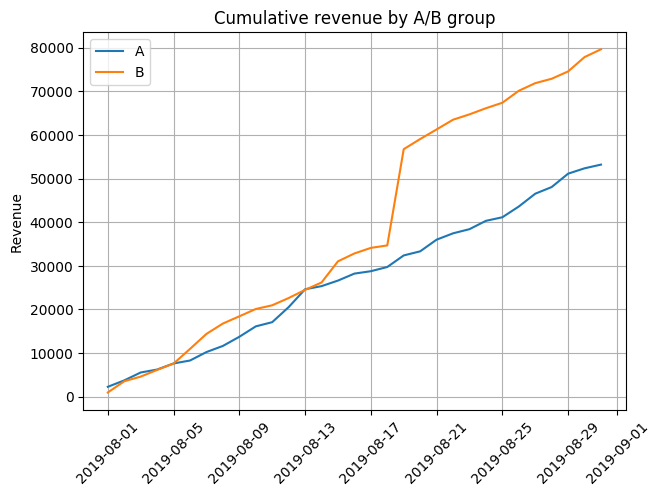

In [35]:
plt.plot(cumulativeRevenueA['date'], 
         cumulativeRevenueA['revenue'], 
         label='A')
plt.plot(cumulativeRevenueB['date'], 
         cumulativeRevenueB['revenue'], 
         label='B')
plt.legend()
plt.ylabel('Revenue')
plt.title('Cumulative revenue by A/B group')
plt.xticks(rotation=45)
plt.grid()
plt.show()

We can see from the graph that the cumulative revenue for both A and B group were going up at about the same rate until mid August. Then B group had a big jump, leading A group by over 20000 in revenue, and kept that lead for the rest of the month.

Potentially there were some extremely large order(s) that happened around that time in B group which caused the spike. Following that, cumulative revenue for A and B group kept going up at about the same rate again.

From the graph, we can see that cumulative revenue from A and B group are roughly grow at about the same rate, except the spike between 17th and 21st of August. We will address the anomaly in the data later in the analysis.

# 3.2 Cumulative average order size by group

Next, let's plot the cumulative average order size by A/B group. We will calculate this as the cumulative revenue divided by the cumulative number of orders.

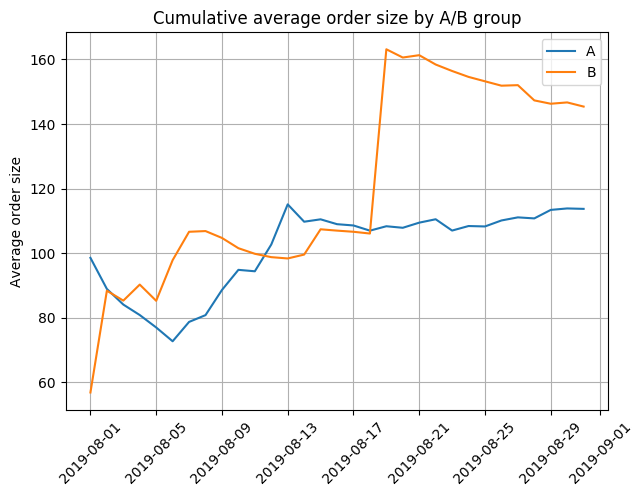

In [36]:
plt.plot(cumulativeRevenueA['date'],
         cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'],
         label='A')
plt.plot(cumulativeRevenueB['date'],
         cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'],
         label='B')
plt.legend()
plt.ylabel('Average order size')
plt.title('Cumulative average order size by A/B group')
plt.xticks(rotation=45)
plt.grid()
plt.show()

We can see from above that there are some fluctuation in average order size for both groups before mid August, and it is hard to tell which one is doing better. Then B group had a big jump, followed by a slow decline.

Once again, this might be the result of some very expensive orders from B group between 17th and 21st of August. We will find out what caused this in a later section.

While A group is shown to start to stablize between 100 and 120, we will need more data on B group to find the true average purchase size and establish its level.

# 3.3 Relative difference in cumulative average order size(B compared with A)

Now let's plot a relative difference graph for the average purchase sizes for B group compared with A group. We will merge the two subsets first and then calculate the difference and plot it.

In [37]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,
                                                   on='date',
                                                   how='left',
                                                   suffixes=['A', 'B'])

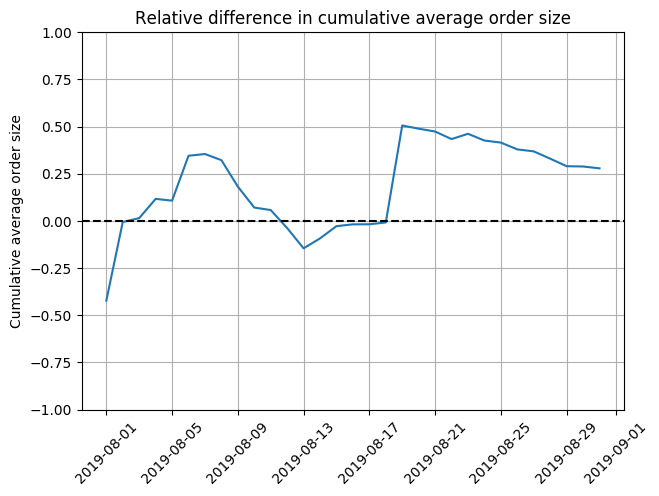

In [38]:
plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB'])
    /
    (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA'])
    - 1)
plt.title('Relative difference in cumulative average order size')
plt.ylabel('Cumulative average order size')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--') 
plt.ylim(-1, 1)
plt.grid()
plt.show()

The relative difference in average purchase size for B group compared with A fluctuates. The suspecious large order(s) is influencing the results here as well, causing B group have more relative gains than losses. However, the going down trend following the spike suggests that, if we remove the anomalies in the data, we might see some relative losses in the last two weeks of the test as well.

We will find out more about this later in the report.

# 3.4 Daily conversion rates of the A/B group

First, we will calculate and plot the daily conversion rate of the A/B group. We will calculate this as the number of orders divided by the number of visitors.

Let's create the dataframe containing the daily conversion rate for both groups.

In [39]:
ordersByGroup = orders.groupby(['group', 'date']).agg(
    {'transactionId': 'count'}).reset_index()
ordersByGroup.columns=['group', 'date', 'orders']
dailyConversion = ordersByGroup.merge(visits, on=['group', 'date'])
dailyConversion['conversion'] = dailyConversion['orders']/dailyConversion['visits']
dailyConversion.head()

,group,date,orders,visits,conversion
0,A,2019-08-01,23,719,0.031989
1,A,2019-08-02,19,619,0.030695
2,A,2019-08-03,24,507,0.047337
3,A,2019-08-04,11,717,0.015342
4,A,2019-08-05,22,756,0.029101


Now, let's create the A/B subsets and plot their the daily conversion rates.

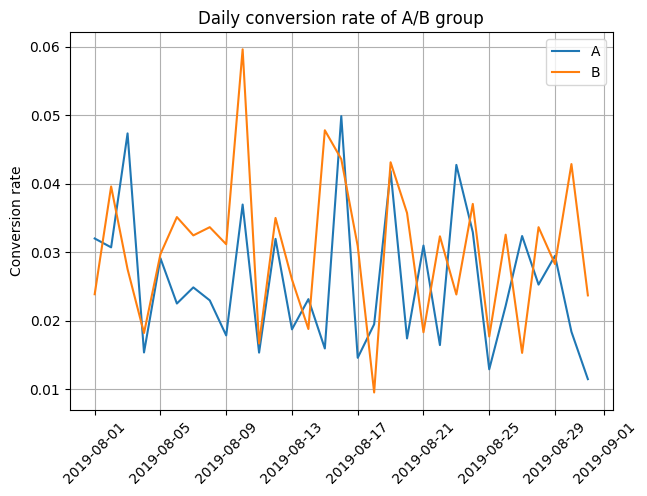

In [40]:
conversionA = dailyConversion[dailyConversion['group'] == 'A']
conversionB = dailyConversion[dailyConversion['group'] == 'B']
plt.plot(conversionA['date'], conversionA['conversion'], label='A')
plt.plot(conversionB['date'], conversionB['conversion'], label='B')
plt.legend()
plt.title('Daily conversion rate of A/B group')
plt.ylabel('Conversion rate')
plt.xticks(rotation=45)
plt.grid()
plt.show()

From the graph above, we can see some a clear spike in B ahead of A in the second week of August, but it's hard to tell overall which group is doing better becauase they both fluctuate strongly.

Let's plot the relative difference in daily conversion rate for B compared with A.

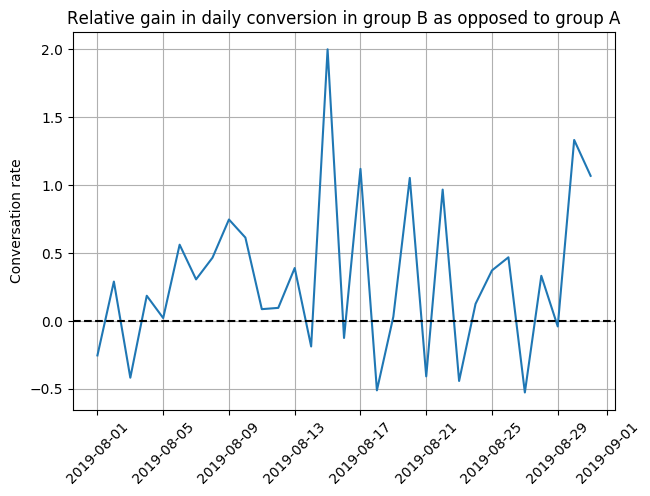

In [41]:
mergedDailyConversions = conversionA[['date', 'conversion']].merge(
    conversionB[['date', 'conversion']],
    on='date',
    how='left',
    suffixes=['A', 'B'])

plt.plot(mergedDailyConversions['date'],
         mergedDailyConversions['conversionB'] /
         mergedDailyConversions['conversionA'] - 1)
plt.title('Relative gain in daily conversion in group B as opposed to group A')
plt.axhline(y=0, color='black', linestyle='--')
#plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])
plt.ylabel('Conversation rate')
plt.xticks(rotation=45)
plt.grid()
plt.show()

We can see from the graph of the relative difference in daily conversion rate that overall there seem to be more relative gains in conversion rate for B group than losses. To get a clear picture of these gains, we will need to take a look at the cumulative conversion rates.

# 3.5 Cumulative conversion rates of the A/B group

Let's use the cumulativeData dataset and plot the cumulative conversion rates for the A/B group.

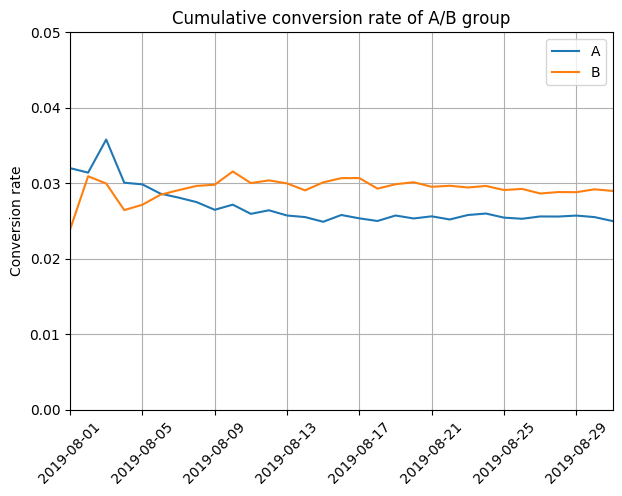

In [42]:
cumulativeData[
    'conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Cumulative conversion rate of A/B group')
plt.ylabel('Conversion rate')
plt.xticks(rotation=45)
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05]) 
plt.grid()
plt.show()

Now it's quite clear that, after the first week in August, group B has been having a consistently higher cumulative conversion rates than group A. Let's look at the gain in conversion rates by plotting relative difference in them for group B compared with group A.

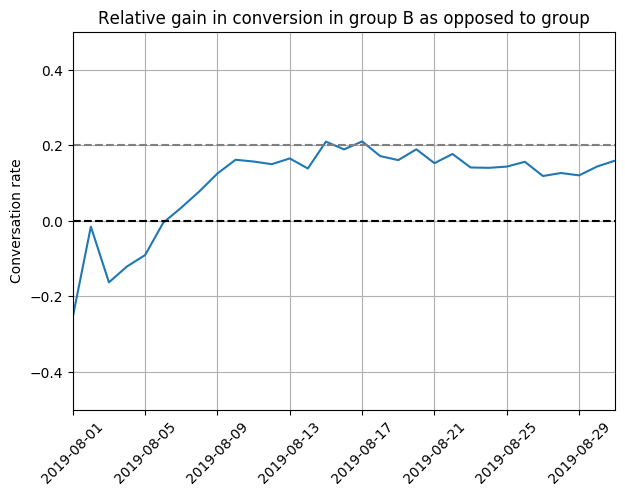

In [43]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(
    cumulativeDataB[['date', 'conversion']],
    on='date',
    how='left',
    suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB'] /
         mergedCumulativeConversions['conversionA'] - 1)
plt.title('Relative gain in conversion in group B as opposed to group')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])
plt.ylabel('Conversation rate')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Now we can see thata, after the first week in August, group B's relative gain in cumulative conversion rates compared with group A climbed up to 0.2 and then fluctuates just slightly below that.

Group B seems to be doing consistently better than group A in terms of conversion rates. Still, we will also need to see what happens to this after removing the anomalies in the data.

# Part 3 summary

The analysis in this sections shows some interesting results. The cumulative revenue for group A and group B seem to rise at about the same rate, except for the spike in mid August for group B, possibly caused by some large order(s). There is no clear pattern in cumulative average purchase size for the two groups, except, again, a spike in mid August for group B. The relative difference in daily conversion rate for group B compared with group A seems to show more gains than losses, which became clear in graph for the relative difference in cumulative conversion rates: group B was leading consistently after the first week in August.

Next, we will take a closer look at the revenue and order number from the data and address the anomalies in these.

# Part 4: Detecting anomalies 

In this section, we will carry out the following plots and calculations:

1. scatter plot of the number of orders per user;
2. the 95th and 99th percentiles for the number of orders per user;
3. scatter plot of order prices; and
4. the 95th and 99th percentiles of order prices.

# 4.1 Scatter plot of the number of orders per user

Let's first create a dataframe containing the number of orders by user.

In [44]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({
    'transactionId':
    pd.Series.nunique,
    'group':
    'max'
})
ordersByUsers.columns=['visitorId', 'orders', 'group']

In [45]:
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders,group
908,3967698036,3,A
55,249864742,3,B
478,2108163459,3,A
687,2988190573,3,A
890,3908431265,3,A
138,611059232,3,A
632,2742574263,3,B
157,678354126,2,A
323,1404560065,2,B
452,1985475298,2,B


There doesn't seem to be any outrageous numbers. Let's plot a scatterplot to show the order number next.

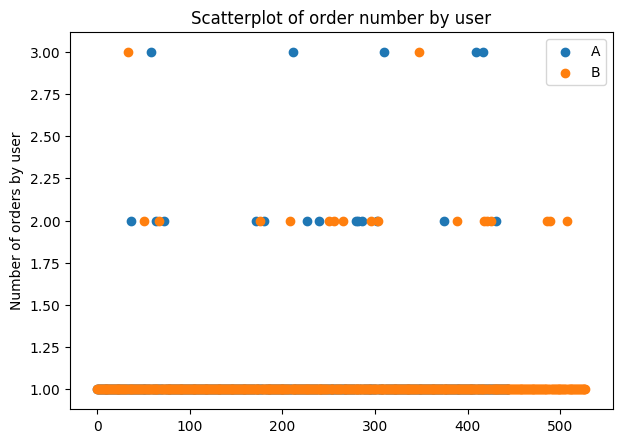

In [46]:
x_values_A = pd.Series(range(0, len(ordersByUsers[ordersByUsers['group'] == 'A']['orders'])))
x_values_B = pd.Series(range(0, len(ordersByUsers[ordersByUsers['group'] == 'B']['orders'])))
plt.scatter(x=x_values_A,
            y=ordersByUsers[ordersByUsers['group'] == 'A']['orders'],
            label='A')
plt.scatter(x=x_values_B,
            y=ordersByUsers[ordersByUsers['group'] == 'B']['orders'],
            label='B')
plt.legend()
plt.title('Scatterplot of order number by user')
plt.ylabel('Number of orders by user')
plt.show()

The scatterplot shows there are 7 users who have made 3 orders, among whom 2 are from B group and rest from A group. There are around a dozen users made 2 orders, and the rest all had 1 order.

# 4.2 95th and 99th percentiles for the number of orders per user

Let's calculate the 95th and 99th percentiles for the order number per user.

In [47]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

99% of the users made 1 or 2 orders. We can consider the 1% 3 orders per user outliers, however, in this case, they are not by any sense extreme. Therefore let's keep them in the data.

# 4.3 Scatter chart of order prices

From previous calculation, we had the suspicion that there might be some expensive orders which caused the spike in cumulative revenue and purchase size in group B. Let's make a scatterplot of the order prices to see what these are.

Here we will make two scatterplots, one with full range of the revenue, the other with reduced range in order to get more details from it.

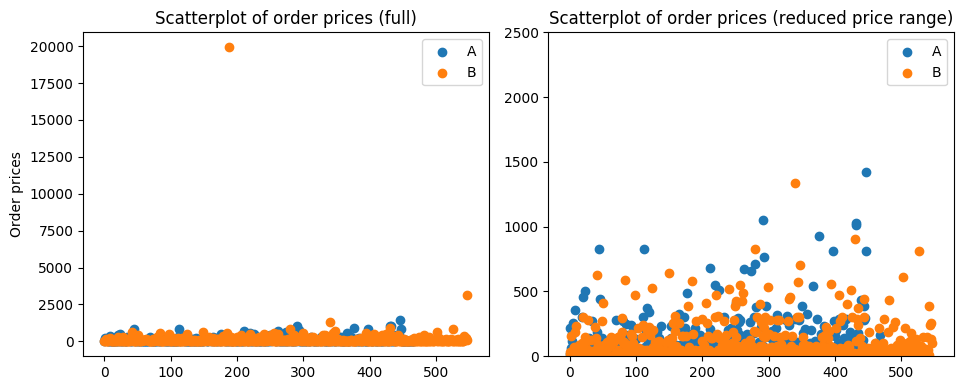

In [48]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 4))

x_values_A = pd.Series(range(0, len(orders[orders['group'] == 'A']['revenue'])))
x_values_B = pd.Series(range(0, len(orders[orders['group'] == 'B']['revenue'])))
ax1.scatter(x=x_values_A, y=orders[orders['group'] == 'A']['revenue'], label = 'A')
ax1.scatter(x=x_values_B, y=orders[orders['group'] == 'B']['revenue'], label = 'B')
ax1.set_title('Scatterplot of order prices (full)')
ax1.set_ylabel('Order prices')
ax1.legend()

ax2.scatter(x=x_values_A,
            y=orders[orders['group'] == 'A']['revenue'], label = 'A')
ax2.scatter(x=x_values_B,
            y=orders[orders['group'] == 'B']['revenue'], label ='B')
ax2.set_title('Scatterplot of order prices (reduced price range)')
ax2.set_ylabel('')
ax2.set_ylim(0, 2500)
ax2.legend()
plt.tight_layout()

Here we can see the B group has an extremely large outlier order price, at almost 20000, and an not so extreme one floating above 2500. Taking both off the graph, we can see that majority of the order prices are under 1000, with just sevaral above.

Let's calculate the 95th and 99th percentiles next.

# 4.4 95th and 99th percentiles of order prices

In [49]:
np.percentile(orders['revenue'], [95, 99])

array([414.275, 830.3  ])

99% of the order prices are 830.3 and lower. Order prices above this point can be considered as anomalies. Given this information, as well as the information from the scatterplot, we can arbitrarily decide the cut off point as 1000 for outliers. When we perform the significance testing in the next section, we can filter out the anomalies based on this.

# Part 4 summary

In this section, using scatter plots and the percentile function, we identified the anomalies in the data. While 3 orders per user represents only 1 percent of the total users, the value itself is not extreme and thus will be kept in the data. On the other hand, while 99% of the order prices are 830.3 and below, the highest order is as extreme as almost 20000. Outliers like this severly skew the data and thus will need to be removed to get a clear understanding of the groups' performance.

# Part 5: Statistical significant testing

In this section, we will perform the following tests:

1. statistical significance of the difference in conversion between the groups using the raw data;

2. statistical significance of the difference in average order size between the groups using the raw data;

3. statistical significance of the difference in conversion between the groups using the filtered data; and

4. statistical significance of the difference in average order size between the groups using the filtered data.

# 5.1 Significance test of the difference in conversion rates using raw data

To test if the A and B group have the same conversion rates, we will use a two sided Mann Whitney U test.

The null hypothesis is that their conversion rates are the same; the alternative hypothesis is that they are different. Threshold for the significance level alpha will be set as 0.05.

First we will create two samples, A and B, which contains the visitors and the number of their orders of each group respectively.

In [50]:
ordersByUsersA = orders[orders['group'] == 'A'].groupby(
    'visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group'] == 'B'].groupby(
    'visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(
    visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(
    visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

Now let's perform the test and print the results. we will also calculate the relative conversion gain for group B compared with group A.

In [51]:
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.011
0.160


The pvalue is smaller than 0.05. Therefore we reject the null hypothesis, and conclude that there is a difference in conversion rates between the two groups. The relative gain of group B is 16%.

# 5.2 Significance test of the difference in average order size using raw data

Let's use the Mann Whitney U test to find out if the two groups have the same average order size. We'll also calculate group B's relative gain in average order size compared with A.

The null hypothesis is the two groups have the same average order size, and the alternative hypothesis is that they have different average order size.

We will set the significance level Alpha as 0.05.

In [52]:
revenueA = orders[orders['group'] == 'A']['revenue']
revenueB = orders[orders['group'] == 'B']['revenue']
print("{0:.3f}".format(
    st.mannwhitneyu(revenueA, revenueB, alternative='two-sided')[1]))
print("{0:.3f}".format(revenueB.mean() / revenueA.mean() - 1))


0.862
0.278


Pvalue is larger than alpha 0.05. Therefore we can't reject the null hypothesis that the two groups have the same average order size. Despite that, we can see that group B has a relative gain of 27.8% in average purchase size compared with A. However, as we mentioned earlier, this could be due to the anomalies in the data. Next, we will perform the same tests using filtered data.

# 5.3 Significance test of the difference in conversion rates using filtered data

Using results from previous sections on detecting anomalies in data, we decided that users who made orders higher than 1000 as anomaly users. Let's first find out who they are.

In [53]:
usersWithExpensiveOrders = orders[orders['revenue'] > 1000]['visitorId']
usersWithExpensiveOrders

425     1920142716
743     4133034833
744      888512513
1099     148427295
1103    1164614297
1136    1307669133
1196    2108080724
Name: visitorId, dtype: int64

There are 7 of them. In what follows, we will filter these users out and perform the Mann Whitney U test for the difference in conversion rate and average order size between the two groups.

In [56]:
sampleA_filtered = pd.concat([ordersByUsersA[~ordersByUsersA['visitorId'].isin(usersWithExpensiveOrders)]['orders'], pd.Series(0, index=np.arange(
    visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleB_filtered = pd.concat([ordersByUsersB[~ordersByUsersB['visitorId'].isin(usersWithExpensiveOrders)]['orders'], pd.Series(0, index=np.arange(
    visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

Let's perform the test on the two samples, print the pvalue, and also calculate the relative gain in conversion rates for B group compared with A group.

In [57]:
print("{0:.3f}".format(
    st.mannwhitneyu(sampleA_filtered,
                    sampleB_filtered,
                    alternative='two-sided')[1]))
print("{0:.3f}".format(sampleB_filtered.mean() / sampleA_filtered.mean() - 1))

0.010
0.163


The pvalue is still smaller than 0.05, so we could still reject the null hypothesis and conclude that there is a difference in the two groups' conversion rates.

The relative gain in conversion rates for B group is 16.3%, 0.3% higher than the results from the raw data.

# 5.4 Significance test of the difference in average order size using filtered data

Now let's use the filtered data to test if the average order size for the two groups are the same. The null and alternative hypothesis, as well as alpha remain the same as in previous test in section 5.2.

We will also calculate the relative gain in average order size for B group compared with A group.

In [58]:
revenueA = orders[(orders['group'] == 'A') & (
    ~orders['visitorId'].isin(usersWithExpensiveOrders))]['revenue']
revenueB = orders[(orders['group'] == 'B') & (
    ~orders['visitorId'].isin(usersWithExpensiveOrders))]['revenue']
print("{0:.3f}".format(st.mannwhitneyu(revenueA, revenueB, alternative='two-sided')[1]))
print("{0:.3f}".format(revenueB.mean()/revenueA.mean()-1))

0.927
-0.034


It's interesting, after removing the anomalous users who made some extremely large orders, the relative change for B group in average order size fell from a 27.8% gain, to a 3.4% loss! The anomalous users must mostly come from the B group.

The pvalue of the test results is still higher than 0.05. So similarly, we can't reject the null hypothesis that the two groups have the same average order size.

# Part 4 summary

In this section, we performed two sets of statistical significance tests, using the raw data and filtered data respectively. The test of the difference in conversion rates between A and B group using both raw and filtered data shows that A and B group have different converstion rate, with B group have a relative gain compared with A at 16% and 16.3%.

Test of the difference in average purchase size using both raw and filtered data failed to reject the null hypothesis. Therefore we do not have the evidence to say their average purchase size is different.

Before removing the anomalies, B group has a relative gain of 27.8% in average purchase size, due to the existence of some extremely large orders, whereas after the removal of the anomalies, B group has a relative loss of 3.4% against A group.

# Part 5: Findings and conclusions

Drawing on the analysis and results in this report, we can conclude:

1. There's a statistically significant difference in conversion between the groups, according to both the raw and the filtered data.

2. Neither the raw nor the filtered data showed a statistically significant difference between the groups in terms of average purchase size. The raw data shows B group has a relative gain in its average purchase size, whereas the filtered data shows a relative loss.

3. he graph of the difference in conversion between the groups shows that group B's results are better than those of group A: they seem to have stabilized around the mean, with some slight fluctuations.

4. The graph of the difference in average purchase size shows fluctuations. With or without the anomalies, we can't really draw any definite conclusions from this graph.

Given the above, one option is to call the test a success, and conclude that the test does prove the hypothesis that the change to the site can lead to higher conversion rate, but does not show that it could lead to increase in average purchase size.

Alternatively, if the hypothesis being tested here is hypothesis 2, which has a relative low effort score of 3, given B group is still fluctuating and not shown to be better or worse in their average purchase size, the company can potentially run the test for another month.

Which option to choose will depend on the company's resources and goals of the test. For example, if whether the 2nd part of the hypothesis could be proved or not will decide on whether the company will adopt the change, then it is probably a good idea to run the test a little longer just to be sure, especially considering the low effort in the test. On the other hand, if the improved conversion rate alone is a motivation to adopt the change, then we can call to stop the test.